In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import f_oneway

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
CP=pd.read_csv(r'C:\Users\Manikantha\Desktop\kaggle\Car_Price\CarPrice_Assignment.csv')

In [5]:
CP.shape

(205, 26)

In [6]:
CP.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
CP.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
CP.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# price

Skewness: 1.777678
Kurtosis: 3.051648


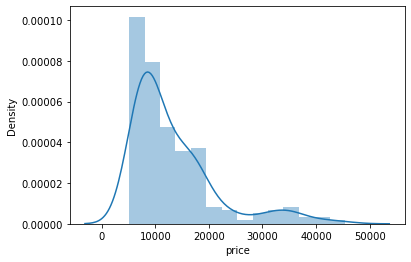

In [10]:
sns.distplot(CP['price']);

print("Skewness: %f" % CP['price'].skew())
print("Kurtosis: %f" % CP['price'].kurt())

In [11]:
CP['price_log']=np.log(CP['price'])

Skewness: 1.777678
Kurtosis: 3.051648


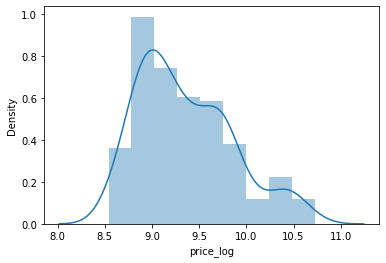

In [12]:
sns.distplot(CP['price_log']);

print("Skewness: %f" % CP['price'].skew())
print("Kurtosis: %f" % CP['price'].kurt())

<AxesSubplot:xlabel='price_log'>

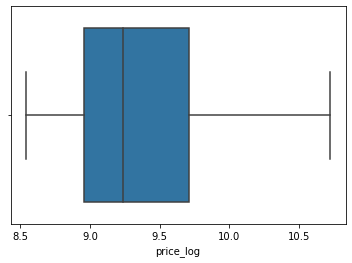

In [13]:
sns.boxplot(CP.price_log)

# car_ID

We will remove this car_ID as this does not contribute any thing for the price.

In [14]:
CP.drop(['car_ID'],axis=1,inplace=True)

In [15]:
CP.drop(['price'],axis=1,inplace=True)

In [16]:
CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

<AxesSubplot:>

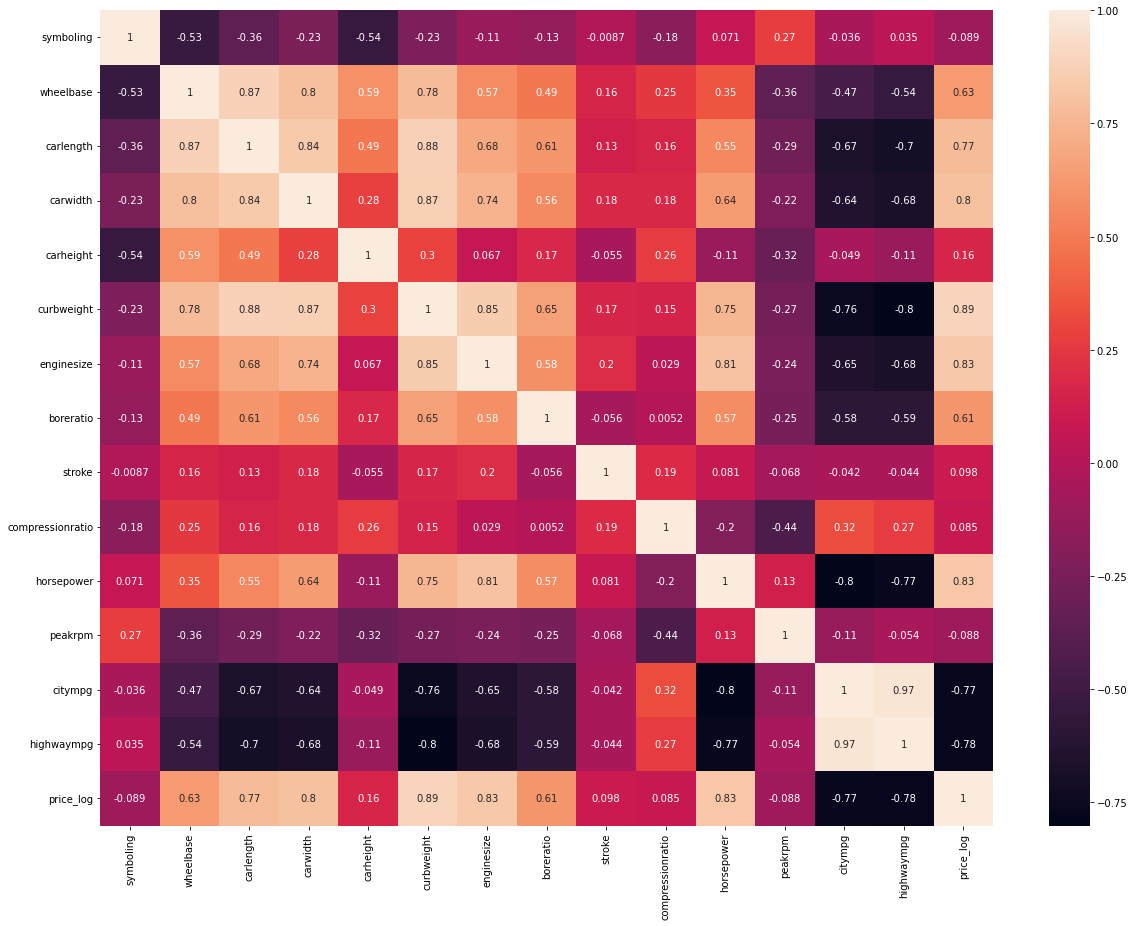

In [17]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(CP.corr(), annot=True)

In [18]:
correlation=CP.corr()
correlation["price_log"].sort_values(ascending=False)*100

price_log           100.000000
curbweight           89.123675
enginesize           83.198469
horsepower           82.583516
carwidth             80.254446
carlength            76.786391
wheelbase            62.940115
boreratio            61.056549
carheight            16.279762
stroke                9.799231
compressionratio      8.514357
peakrpm              -8.845402
symboling            -8.871703
citympg             -77.161515
highwaympg          -77.519689
Name: price_log, dtype: float64

# curbweight

Skewness: 0.681398
Kurtosis: -0.042854


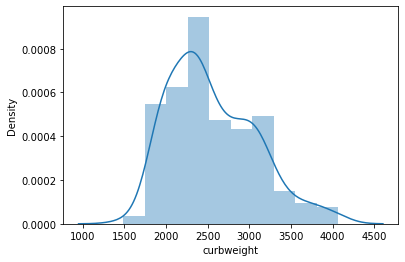

In [19]:
sns.distplot(CP['curbweight']);

print("Skewness: %f" % CP['curbweight'].skew())
print("Kurtosis: %f" % CP['curbweight'].kurt())
#curbweight Data is normaly Distributed skewness and kurtosis are also in the normality range.

<AxesSubplot:xlabel='curbweight'>

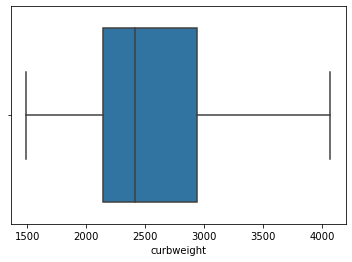

In [20]:
sns.boxplot(CP.curbweight)

# enginesize

Skewness: 1.947655
Kurtosis: 5.305682


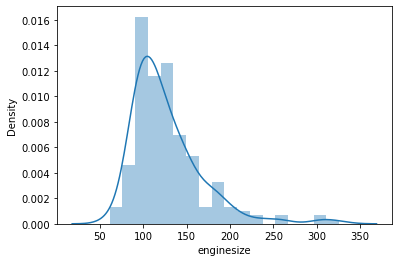

In [21]:
sns.distplot(CP['enginesize']);

print("Skewness: %f" % CP['enginesize'].skew())
print("Kurtosis: %f" % CP['enginesize'].kurt())
#curbweight Data is not normaly Distributed skewness and kurtosis are out of the the normality range.

In [22]:
CP['enginesize_log']=np.log(CP['enginesize'])

Skewness: 0.857828
Kurtosis: 1.009197


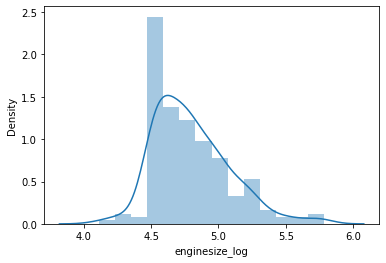

In [23]:
sns.distplot(CP['enginesize_log']);

print("Skewness: %f" % CP['enginesize_log'].skew())
print("Kurtosis: %f" % CP['enginesize_log'].kurt())
#enginesize Data is normaly Distributed skewness and kurtosis are also in the normality range.

In [24]:
CP.drop(['enginesize'],axis=1,inplace=True)

<AxesSubplot:xlabel='enginesize_log'>

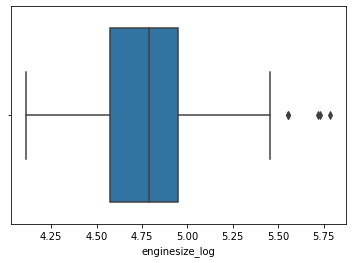

In [25]:
sns.boxplot(CP.enginesize_log)

In [26]:
CP['enginesize_log'].describe()

count    205.000000
mean       4.800184
std        0.282966
min        4.110874
25%        4.574711
50%        4.787492
75%        4.948760
max        5.786897
Name: enginesize_log, dtype: float64

In [27]:
IQR=CP.enginesize_log.quantile(0.75)-CP.enginesize_log.quantile(0.25)
print(IQR)

0.3740489118747856


In [28]:
upper_bridge=CP['enginesize_log'].quantile(0.75)+IQR*1.5
print(upper_bridge)

5.509833258190347


In [29]:
CP.loc[CP['enginesize_log']>=5.509833258190347,'enginesize_log']=5.509833258190347

<AxesSubplot:xlabel='enginesize_log'>

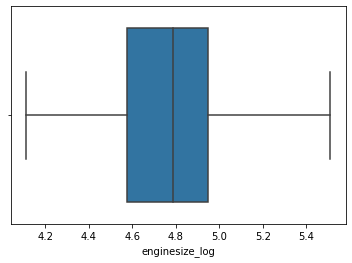

In [30]:
sns.boxplot(CP.enginesize_log)

# horsepower

Skewness: 1.405310
Kurtosis: 2.684006


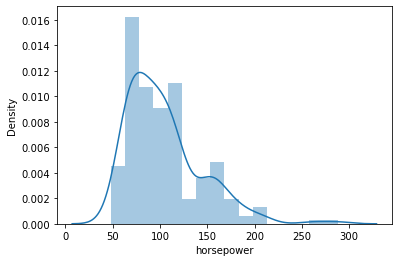

In [31]:
sns.distplot(CP['horsepower']);

print("Skewness: %f" % CP['horsepower'].skew())
print("Kurtosis: %f" % CP['horsepower'].kurt())
#curbweight Data is not normaly Distributed  kurtosis are out of the the normality range.

In [32]:
CP['horsepower_log']=np.log(CP['horsepower'])

Skewness: 0.482838
Kurtosis: -0.266552


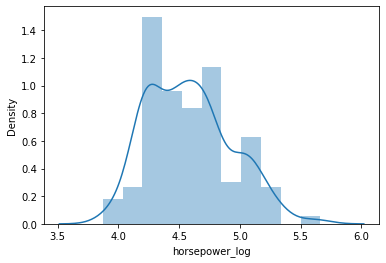

In [33]:
sns.distplot(CP['horsepower_log']);

print("Skewness: %f" % CP['horsepower_log'].skew())
print("Kurtosis: %f" % CP['horsepower_log'].kurt())
#enginesize Data is normaly Distributed skewness and kurtosis are also in the normality range.

In [34]:
CP.drop(['horsepower'],axis=1,inplace=True)

<AxesSubplot:xlabel='horsepower_log'>

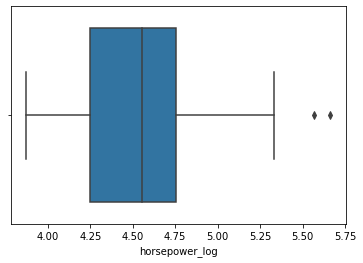

In [35]:
sns.boxplot(CP.horsepower_log)

In [36]:
CP['horsepower_log'].describe()

count    205.000000
mean       4.583295
std        0.344894
min        3.871201
25%        4.248495
50%        4.553877
75%        4.753590
max        5.662960
Name: horsepower_log, dtype: float64

In [37]:
IQR=CP.horsepower_log.quantile(0.75)-CP.horsepower_log.quantile(0.25)
print(IQR)

0.5050949490570051


In [38]:
upper_bridge=CP['horsepower_log'].quantile(0.75)+IQR*1.5
print(upper_bridge)

5.511232614691872


In [39]:
CP.loc[CP['horsepower_log']>=5.511232614691872,'horsepower_log']=5.511232614691872

<AxesSubplot:xlabel='horsepower_log'>

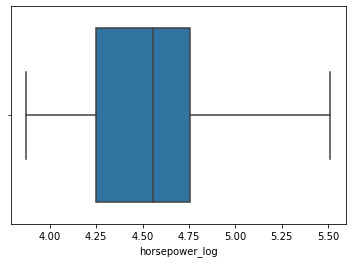

In [40]:
sns.boxplot(CP.horsepower_log)

# carwidth

Skewness: 0.904003
Kurtosis: 0.702764


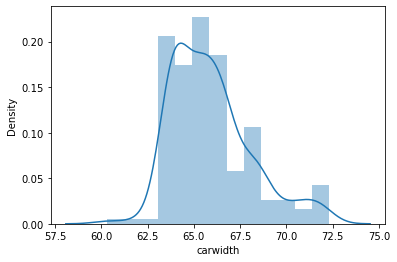

In [41]:
sns.distplot(CP['carwidth']);

print("Skewness: %f" % CP['carwidth'].skew())
print("Kurtosis: %f" % CP['carwidth'].kurt())
#curbweight Data is  normaly Distributed  skewness and kurtosis are in  the the normality range.

<AxesSubplot:xlabel='carwidth'>

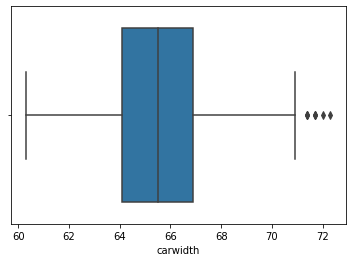

In [42]:
sns.boxplot(CP.carwidth)

In [43]:
CP['carwidth'].describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: carwidth, dtype: float64

In [44]:
IQR=CP.carwidth.quantile(0.75)-CP.carwidth.quantile(0.25)
print(IQR)

2.8000000000000114


In [45]:
upper_bridge=CP['carwidth'].quantile(0.75)+IQR*1.5
print(upper_bridge)

71.10000000000002


In [46]:
CP.loc[CP['carwidth']>=71.100,'carwidth']=71.100

<AxesSubplot:xlabel='carwidth'>

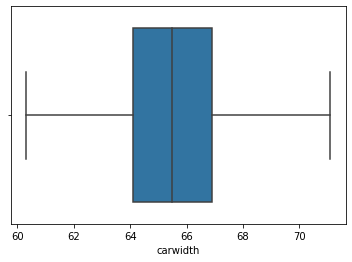

In [47]:
sns.boxplot(CP.carwidth)

# carlength

Skewness: 0.155954
Kurtosis: -0.082895


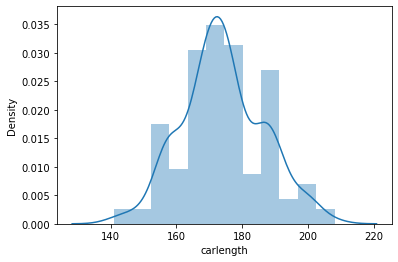

In [48]:
sns.distplot(CP['carlength']);

print("Skewness: %f" % CP['carlength'].skew())
print("Kurtosis: %f" % CP['carlength'].kurt())
#carlength Data is  normaly Distributed  skewness and kurtosis are in  the the normality range.

<AxesSubplot:xlabel='carlength'>

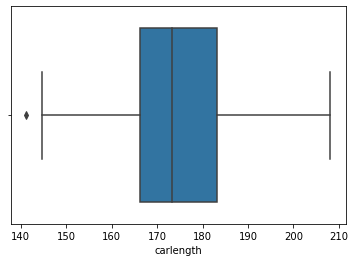

In [49]:
sns.boxplot(CP.carlength)

# wheelbase

Skewness: 1.050214
Kurtosis: 1.017039


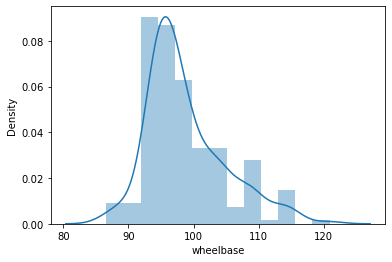

In [50]:
sns.distplot(CP['wheelbase']);

print("Skewness: %f" % CP['wheelbase'].skew())
print("Kurtosis: %f" % CP['wheelbase'].kurt())
#wheelbase Data is  normaly Distributed  skewness and kurtosis are in  the the normality range.

<AxesSubplot:xlabel='wheelbase'>

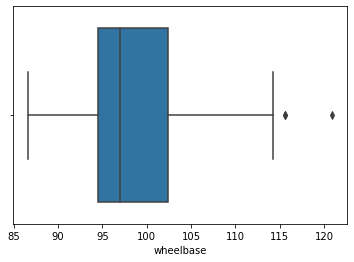

In [51]:
sns.boxplot(CP.wheelbase)

In [52]:
CP['wheelbase'].describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

In [53]:
IQR=CP.wheelbase.quantile(0.75)-CP.wheelbase.quantile(0.25)
IQR

7.900000000000006

In [54]:
UB=CP.wheelbase.quantile(0.75)+IQR*1.5
UB

114.25000000000001

In [55]:
CP.loc[CP['wheelbase']>=114.250,'wheelbase']=114.250

<AxesSubplot:xlabel='wheelbase'>

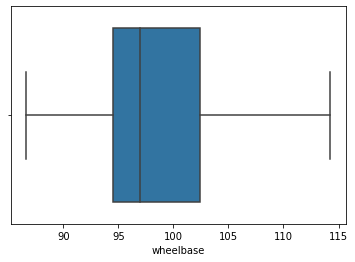

In [56]:
sns.boxplot(CP.wheelbase)

# boreratio

Skewness: 0.020156
Kurtosis: -0.785042


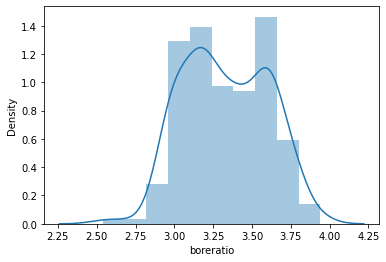

In [57]:
sns.distplot(CP['boreratio']);

print("Skewness: %f" % CP['boreratio'].skew())
print("Kurtosis: %f" % CP['boreratio'].kurt())
#wheelbase Data is  normaly Distributed  skewness and kurtosis are in  the the normality range.

<AxesSubplot:xlabel='boreratio'>

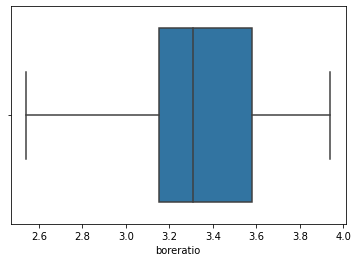

In [58]:
sns.boxplot(CP.boreratio)

# carheight

Skewness: 0.063123
Kurtosis: -0.443812


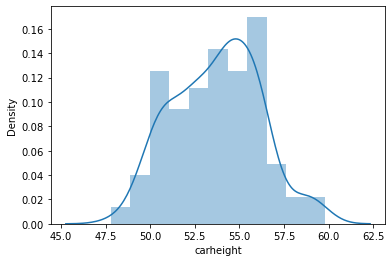

In [59]:
sns.distplot(CP['carheight']);

print("Skewness: %f" % CP['carheight'].skew())
print("Kurtosis: %f" % CP['carheight'].kurt())
#wheelbase Data is  normaly Distributed  skewness and kurtosis are in  the the normality range.

<AxesSubplot:xlabel='carheight'>

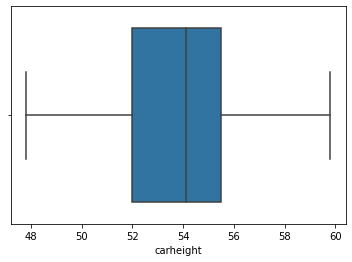

In [60]:
sns.boxplot(CP.carheight)

# stroke

Skewness: -0.689705
Kurtosis: 2.174396


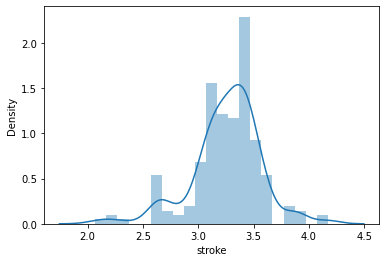

In [61]:
sns.distplot(CP['stroke']);

print("Skewness: %f" % CP['stroke'].skew())
print("Kurtosis: %f" % CP['stroke'].kurt())
#wheelbase Data is  normaly Distributed  skewness and kurtosis are in  the the normality range.

<AxesSubplot:xlabel='stroke'>

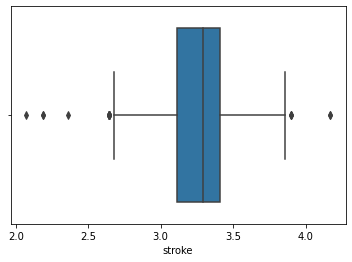

In [62]:
sns.boxplot(CP.stroke)

Looks like outlayers but we will not delete.
practically it will vary.

# compressionratio

Skewness: 2.610862
Kurtosis: 5.233054


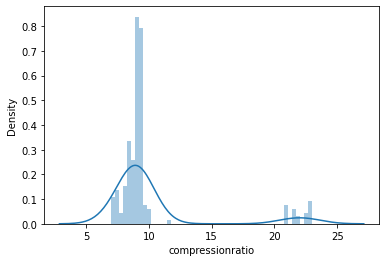

In [63]:
sns.distplot(CP['compressionratio']);

print("Skewness: %f" % CP['compressionratio'].skew())
print("Kurtosis: %f" % CP['compressionratio'].kurt())
#wheelbase Data is  normaly Distributed  skewness and kurtosis are in  the the normality range

<AxesSubplot:xlabel='compressionratio'>

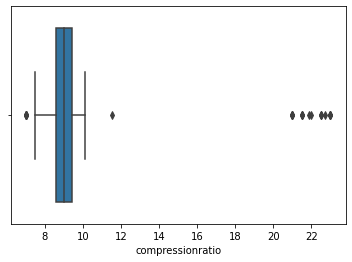

In [64]:
sns.boxplot(CP.compressionratio)

# symboling(bad)

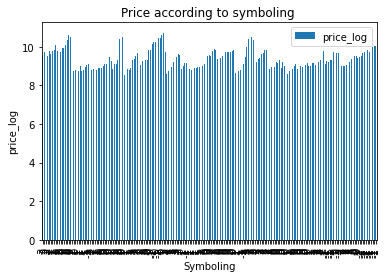

In [65]:
CP.plot(x='symboling', y='price_log', kind="bar")
 
plt.xlabel('Symboling')
plt.ylabel('price_log')
plt.title('Price according to symboling ')
plt.show()

<AxesSubplot:xlabel='symboling', ylabel='count'>

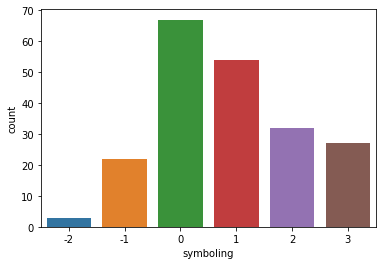

In [66]:
sns.countplot('symboling', data=CP)

<AxesSubplot:xlabel='symboling', ylabel='price_log'>

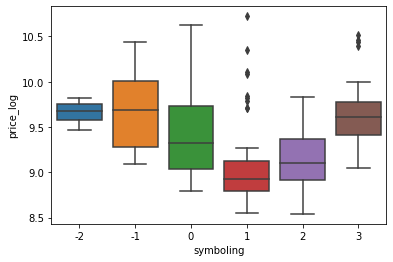

In [67]:
sns.boxplot(CP.symboling,CP.price_log)

In [68]:
mod = ols('price_log ~ symboling', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df     sum_sq   mean_sq        F    PR(>F)
symboling    1.0   0.407539  0.407539  1.61043  0.205885
Residual   203.0  51.371678  0.253062      NaN       NaN


Here p(0.20) value is greater than 0.05, Hence There is no statistical significant difference between 'symbolling'
across different values of 'price'.

Hence it is a Bad pridictor.

# CarName(d)

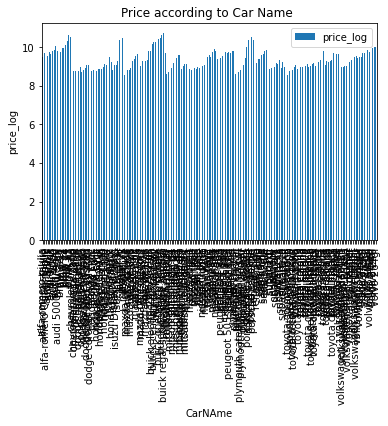

In [69]:
CP.plot(x='CarName', y='price_log', kind="bar")
 
plt.xlabel('CarNAme')
plt.ylabel('price_log')
plt.title('Price according to Car Name ')
plt.show()

<AxesSubplot:xlabel='CarName', ylabel='count'>

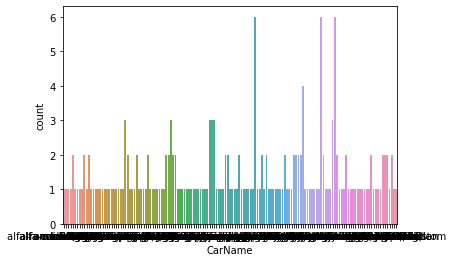

In [70]:
sns.countplot('CarName', data=CP)

In [71]:
mod = ols('price_log ~ CarName', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

             df     sum_sq   mean_sq         F        PR(>F)
CarName   146.0  48.097477  0.329435  5.189725  5.328702e-11
Residual   58.0   3.681740  0.063478       NaN           NaN


In [72]:
#Here p(1.418700e-10) value is less than 0.05, Hence atlest one should be different from others.
#

In [73]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(CP.price_log, CP.CarName, alpha = 0.05)
print(result)

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
             group1                          group2             meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------
                   Nissan versa        alfa-romero Quadrifoglio   1.0988    0.9  -0.601  2.7986  False
                   Nissan versa              alfa-romero giulia   0.8978    0.9 -0.8021  2.5976  False
                   Nissan versa             alfa-romero stelvio   1.0988    0.9  -0.601  2.7986  False
                   Nissan versa                     audi 100 ls   0.9309    0.9 -0.7689  2.6307  False
                   Nissan versa                      audi 100ls   1.1622 0.4867 -0.3099  2.6342  False
                   Nissan versa                       audi 4000   1.4683 0.2525 -0.2315  3.1681  False
                   Nissan versa                       audi 5000   1.2357 

# fueltype

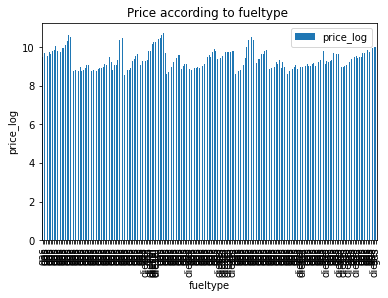

In [74]:
CP.plot(x='fueltype', y='price_log', kind="bar")
 
plt.xlabel('fueltype')
plt.ylabel('price_log')
plt.title('Price according to fueltype ')
plt.show()

<AxesSubplot:xlabel='fueltype', ylabel='count'>

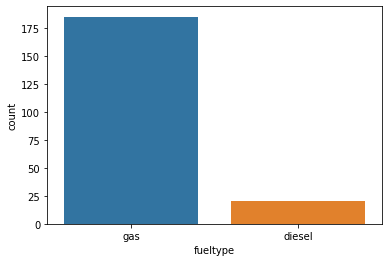

In [75]:
sns.countplot('fueltype', data=CP)

<AxesSubplot:xlabel='fueltype', ylabel='price_log'>

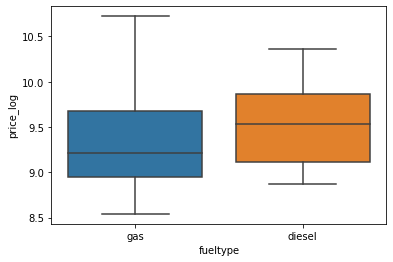

In [76]:
sns.boxplot(CP.fueltype,CP.price_log)

In [77]:
mod = ols('price_log ~ fueltype', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

             df     sum_sq   mean_sq        F    PR(>F)
fueltype    1.0   0.910953  0.910953  3.63534  0.057977
Residual  203.0  50.868264  0.250583      NaN       NaN


In [78]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(CP.price_log, CP.fueltype, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
diesel    gas  -0.2247 0.058 -0.457 0.0077  False
-------------------------------------------------


Here p(0.054832) value is greater than 0.05, Hence There is no statistical significant difference between 'fueltype' across different values of 'price'.

 Hence we will consider it as a bad predictor

# aspiration-good

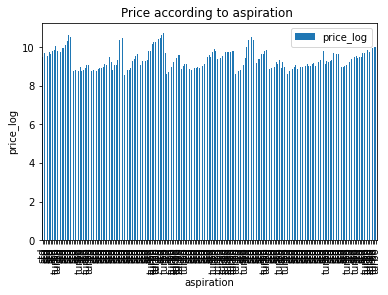

In [79]:
CP.plot(x='aspiration', y='price_log', kind="bar")
 
plt.xlabel('aspiration')
plt.ylabel('price_log')
plt.title('Price according to aspiration ')
plt.show()

<AxesSubplot:xlabel='aspiration', ylabel='count'>

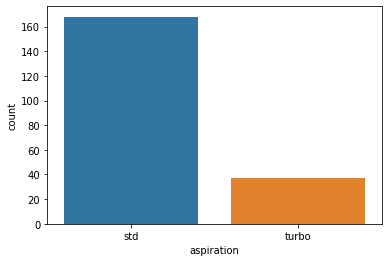

In [80]:
sns.countplot('aspiration', data=CP)

<AxesSubplot:xlabel='aspiration', ylabel='price_log'>

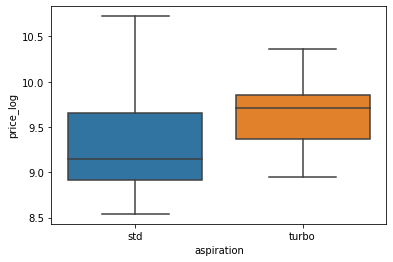

In [81]:
sns.boxplot(CP.aspiration,CP.price_log)

In [82]:
mod = ols('price_log ~ aspiration', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

               df     sum_sq   mean_sq          F    PR(>F)
aspiration    1.0   3.431646  3.431646  14.408671  0.000194
Residual    203.0  48.347570  0.238165        NaN       NaN


In [83]:
result = pairwise_tukeyhsd(CP.price_log, CP.aspiration, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   std  turbo   0.3364 0.001 0.1617 0.5112   True
-------------------------------------------------


In [84]:
#Here p(0.000136) value is less than 0.05, Hence both std and turbo different from each others.
#good predictor

# doornumber

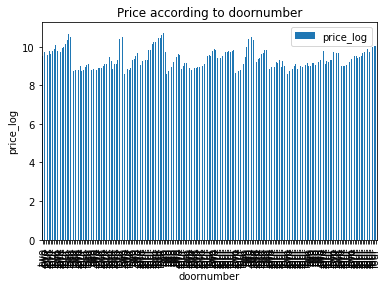

In [85]:
CP.plot(x='doornumber', y='price_log', kind="bar")
 
plt.xlabel('doornumber')
plt.ylabel('price_log')
plt.title('Price according to doornumber')
plt.show()

<AxesSubplot:xlabel='doornumber', ylabel='count'>

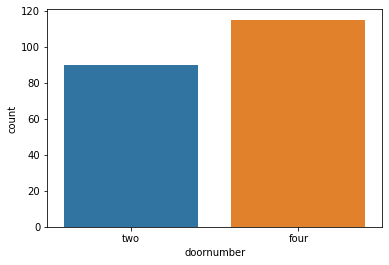

In [86]:
sns.countplot('doornumber', data=CP)

<AxesSubplot:xlabel='doornumber', ylabel='price_log'>

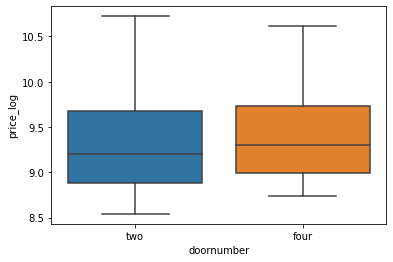

In [87]:
sns.boxplot(CP.doornumber,CP.price_log)

In [88]:
mod = ols('price_log ~ doornumber', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

               df     sum_sq   mean_sq         F    PR(>F)
doornumber    1.0   0.388481  0.388481  1.534551  0.216861
Residual    203.0  51.390736  0.253156       NaN       NaN


Here p(0.187854) value is greater than 0.05, Hence There is no statistical significant difference between 'dornumber' across different values of 'price'.
hence Bad predictor

# carbody

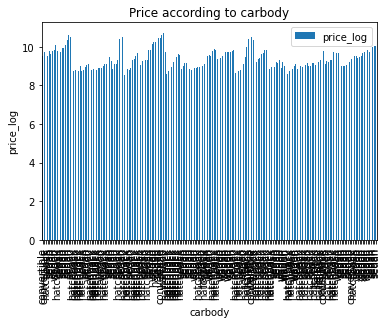

In [89]:
CP.plot(x='carbody', y='price_log', kind="bar")
 
plt.xlabel('carbody')
plt.ylabel('price_log')
plt.title('Price according to carbody')
plt.show()

<AxesSubplot:xlabel='carbody', ylabel='count'>

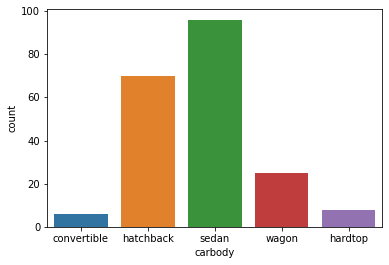

In [90]:
sns.countplot('carbody', data=CP)

<AxesSubplot:xlabel='carbody', ylabel='price_log'>

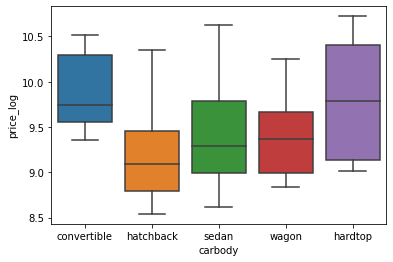

In [91]:
sns.boxplot(CP.carbody,CP.price_log)

In [92]:
mod = ols('price_log ~ carbody', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

             df     sum_sq   mean_sq         F    PR(>F)
carbody     4.0   6.631666  1.657916  7.344436  0.000015
Residual  200.0  45.147551  0.225738       NaN       NaN


In [93]:
result = pairwise_tukeyhsd(CP.price_log, CP.carbody, alpha = 0.05)
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2  meandiff p-adj   lower   upper  reject
------------------------------------------------------------
convertible   hardtop  -0.0966    0.9  -0.803  0.6097  False
convertible hatchback  -0.7358 0.0032 -1.2922 -0.1794   True
convertible     sedan  -0.4591 0.1504 -1.0095  0.0913  False
convertible     wagon  -0.5399 0.0947 -1.1345  0.0547  False
    hardtop hatchback  -0.6392 0.0036 -1.1273  -0.151   True
    hardtop     sedan  -0.3624  0.236 -0.8437  0.1189  False
    hardtop     wagon  -0.4433 0.1502 -0.9746   0.088  False
  hatchback     sedan   0.2768 0.0025  0.0712  0.4823   True
  hatchback     wagon   0.1959 0.3955 -0.1088  0.5007  False
      sedan     wagon  -0.0808    0.9 -0.3745  0.2129  False
------------------------------------------------------------


In [94]:
CP.carbody.replace(to_replace=['convertible','sedan','hatchback'],value=['hardtop','wagon','wagon'],inplace=True)

<AxesSubplot:xlabel='carbody', ylabel='price_log'>

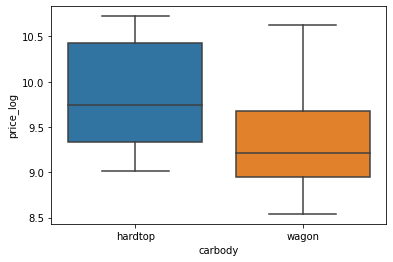

In [95]:
sns.boxplot(CP.carbody,CP.price_log)

In [96]:
CP.carbody.replace(to_replace=['wagon'],value=['wagon carbody'],inplace=True)

<AxesSubplot:xlabel='carbody', ylabel='price_log'>

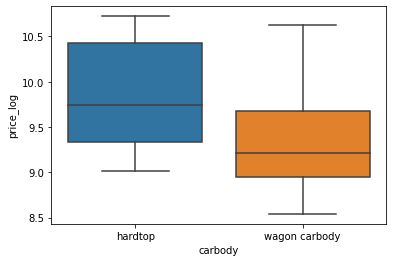

In [97]:
sns.boxplot(CP.carbody,CP.price_log)

In [98]:
result = pairwise_tukeyhsd(CP.price_log, CP.carbody, alpha = 0.05)
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1     group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
hardtop wagon carbody  -0.5159 0.001 -0.7822 -0.2495   True
-----------------------------------------------------------


# drivewheel(good)

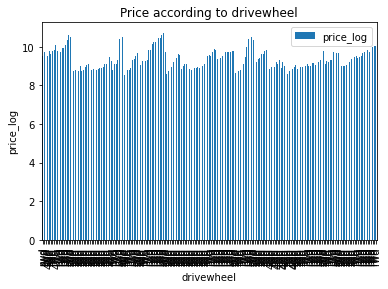

In [99]:
CP.plot(x='drivewheel', y='price_log', kind="bar")
 
plt.xlabel('drivewheel')
plt.ylabel('price_log')
plt.title('Price according to drivewheel')
plt.show()

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

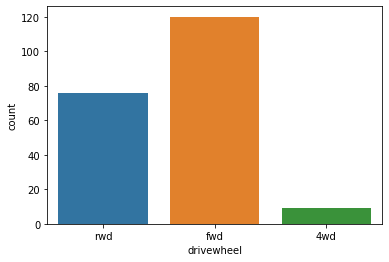

In [100]:
sns.countplot('drivewheel', data=CP)

<AxesSubplot:xlabel='drivewheel', ylabel='price_log'>

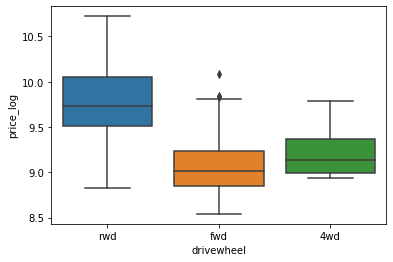

In [101]:
sns.boxplot(CP.drivewheel,CP.price_log)

In [102]:
mod = ols('price_log ~ drivewheel', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

               df     sum_sq    mean_sq          F        PR(>F)
drivewheel    2.0  24.512115  12.256058  90.795262  7.410259e-29
Residual    202.0  27.267102   0.134986        NaN           NaN


In [103]:
result = pairwise_tukeyhsd(CP.price_log, CP.drivewheel, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   4wd    fwd  -0.1846 0.3159 -0.4845 0.1152  False
   4wd    rwd     0.54  0.001  0.2342 0.8458   True
   fwd    rwd   0.7246  0.001  0.5974 0.8518   True
---------------------------------------------------


In [104]:
CP.drivewheel.replace(to_replace=['4wd'],value=['fwd'],inplace=True)

<AxesSubplot:xlabel='drivewheel', ylabel='price_log'>

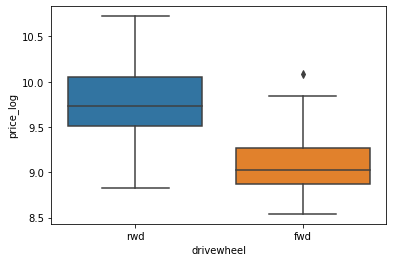

In [105]:
sns.boxplot(CP.drivewheel,CP.price_log)

p value(7.410259e-29) less than 0.05, Hence atlest one sholud be different from others.

# enginelocation(good)

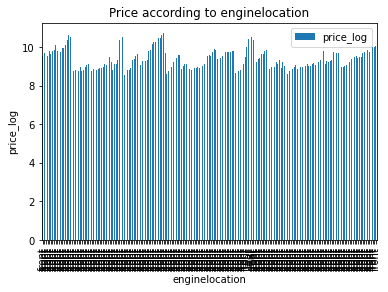

In [106]:
CP.plot(x='enginelocation', y='price_log', kind="bar")
 
plt.xlabel('enginelocation')
plt.ylabel('price_log')
plt.title('Price according to enginelocation')
plt.show()

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

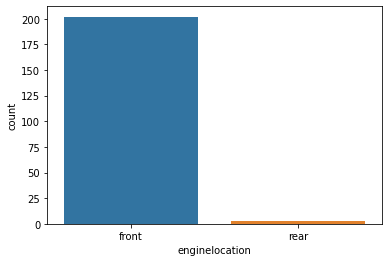

In [107]:
sns.countplot('enginelocation', data=CP)

<AxesSubplot:xlabel='enginelocation', ylabel='price_log'>

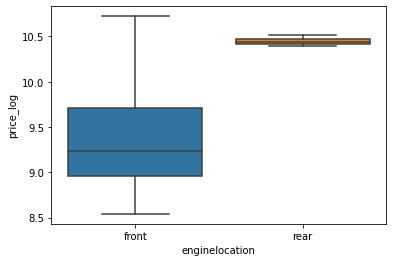

In [108]:
sns.boxplot(CP.enginelocation,CP.price_log)

In [109]:
mod = ols('price_log ~ enginelocation', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df     sum_sq  mean_sq          F    PR(>F)
enginelocation    1.0   3.639810  3.63981  15.348784  0.000122
Residual        203.0  48.139407  0.23714        NaN       NaN


In [110]:
result = pairwise_tukeyhsd(CP.price_log, CP.enginelocation, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
 front   rear   1.1096 0.001 0.5512 1.6681   True
-------------------------------------------------


p value(0.000122) less than .05,Hence Atlest one should be different from one another.

# enginetype(good)

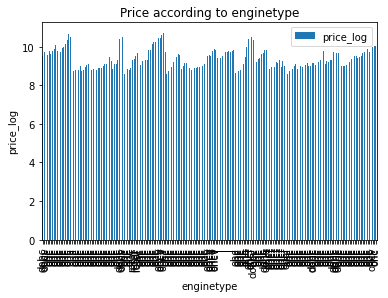

In [111]:
CP.plot(x='enginetype', y='price_log', kind="bar")
 
plt.xlabel('enginetype')
plt.ylabel('price_log')
plt.title('Price according to enginetype')
plt.show()

<AxesSubplot:xlabel='enginetype', ylabel='count'>

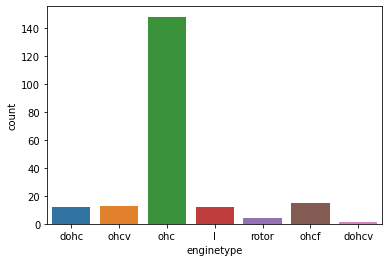

In [112]:
sns.countplot('enginetype', data=CP)

<AxesSubplot:xlabel='enginetype', ylabel='price_log'>

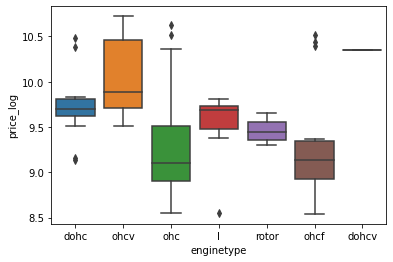

In [113]:
sns.boxplot(CP.enginetype,CP.price_log)

In [114]:
mod = ols('price_log ~ enginetype', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

               df     sum_sq   mean_sq         F        PR(>F)
enginetype    6.0  11.079503  1.846584  8.983444  1.106730e-08
Residual    198.0  40.699714  0.205554       NaN           NaN


In [115]:
result = pairwise_tukeyhsd(CP.price_log, CP.enginetype, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  dohc  dohcv   0.6262  0.818 -0.7795  2.0319  False
  dohc      l  -0.1815    0.9 -0.7329  0.3699  False
  dohc    ohc  -0.4849 0.0082 -0.8903 -0.0796   True
  dohc   ohcf  -0.4163 0.2167 -0.9393  0.1068  False
  dohc   ohcv   0.3087 0.6003 -0.2319  0.8494  False
  dohc  rotor  -0.2635    0.9 -1.0433  0.5162  False
 dohcv      l  -0.8077 0.5941 -2.2134   0.598  False
 dohcv    ohc  -1.1111 0.1865 -2.4663   0.244  False
 dohcv   ohcf  -1.0425 0.2863 -2.4373  0.3524  False
 dohcv   ohcv  -0.3175    0.9  -1.719   1.084  False
 dohcv  rotor  -0.8897 0.5686 -2.3997  0.6202  False
     l    ohc  -0.3034 0.2846 -0.7088  0.1019  False
     l   ohcf  -0.2348 0.8122 -0.7578  0.2883  False
     l   ohcv   0.4902 0.1034 -0.0504  1.0309  False
     l  rotor   -0.082    0.9 -0.8618  0.6977  False
   ohc   ohcf   0.0687    0.9 -0.2973  0.4346 

In [116]:
CP.enginetype.replace(to_replace=['dohc','dohc','ohcv','l'],value=['dohcv','ohcf','rotor','ohc'],inplace=True)

<AxesSubplot:xlabel='enginetype', ylabel='price_log'>

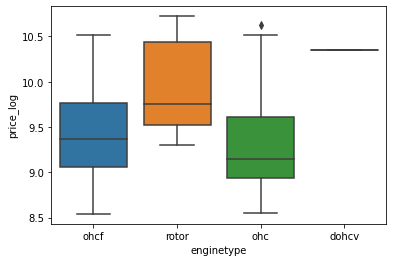

In [117]:
sns.boxplot(CP.enginetype,CP.price_log)

In [118]:
result = pairwise_tukeyhsd(CP.price_log, CP.enginetype, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 dohcv    ohc  -1.0884 0.0964 -2.3026 0.1259  False
 dohcv   ohcf  -0.8575 0.2755 -2.0902 0.3752  False
 dohcv  rotor  -0.4521 0.7578 -1.6977 0.7934  False
   ohc   ohcf   0.2309 0.0853 -0.0209 0.4828  False
   ohc  rotor   0.6362  0.001  0.3274  0.945   True
  ohcf  rotor   0.4053 0.0283  0.0305 0.7801   True
---------------------------------------------------


In [119]:
CP.enginetype.replace(to_replace=['dohcv','dohcv'],value=['ohc','rotor'],inplace=True)

<AxesSubplot:xlabel='enginetype', ylabel='price_log'>

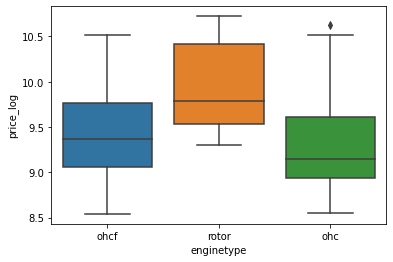

In [120]:
sns.boxplot(CP.enginetype,CP.price_log)

In [121]:
result = pairwise_tukeyhsd(CP.price_log, CP.enginetype, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   ohc   ohcf   0.2309 0.0482 0.0014 0.4604   True
   ohc  rotor   0.6614  0.001 0.3872 0.9356   True
  ohcf  rotor   0.4304 0.0078 0.0948 0.7661   True
--------------------------------------------------


p value(1.106730e-08) less than the 0.05, hence at least one should be different from one other.

# cylindernumber(good)

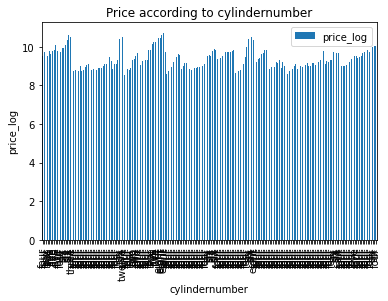

In [122]:
CP.plot(x='cylindernumber', y='price_log', kind="bar")
 
plt.xlabel('cylindernumber')
plt.ylabel('price_log')
plt.title('Price according to cylindernumber')
plt.show()

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

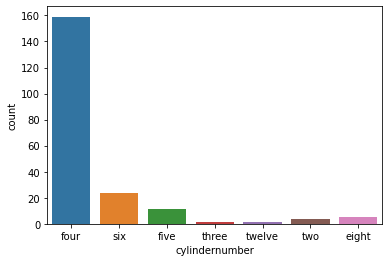

In [123]:
sns.countplot('cylindernumber', data=CP)

<AxesSubplot:xlabel='cylindernumber', ylabel='price_log'>

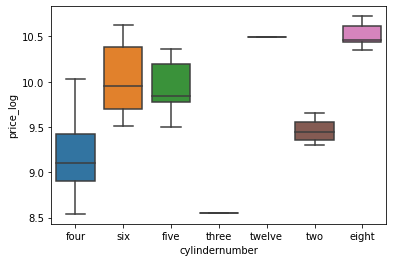

In [124]:
sns.boxplot(CP.cylindernumber,CP.price_log)

In [125]:
mod = ols('price_log ~ cylindernumber', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df     sum_sq   mean_sq          F        PR(>F)
cylindernumber    6.0  28.063653  4.677276  39.050329  4.032064e-31
Residual        198.0  23.715564  0.119776        NaN           NaN


In [126]:
result = pairwise_tukeyhsd(CP.price_log, CP.cylindernumber, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 eight   five  -0.5751 0.0375 -1.1311  -0.019   True
 eight   four  -1.3467  0.001  -1.815 -0.8785   True
 eight    six  -0.5129 0.0453 -1.0197 -0.0061   True
 eight  three  -1.9735  0.001 -3.1029 -0.8442   True
 eight twelve  -0.0292    0.9 -1.1585  1.1001  False
 eight    two  -1.0556  0.001 -1.7472 -0.3641   True
  five   four  -0.7717  0.001 -1.0931 -0.4503   True
  five    six   0.0622    0.9 -0.3132  0.4376  False
  five  three  -1.3985 0.0028 -2.4753 -0.3217   True
  five twelve   0.5458 0.7114 -0.5309  1.6226  False
  five    two  -0.4806 0.2133 -1.0825  0.1213  False
  four    six   0.8339  0.001  0.6081  1.0596   True
  four  three  -0.6268 0.5394  -1.661  0.4074  False
  four twelve   1.3175 0.0037  0.2833  2.3517   True
  four    two   0.2911 0.6233 -0.2308   0.813  False
   six  three  -1.4607  0.001 -2.5129 -0.4085 

In [127]:
CP.cylindernumber.replace(to_replace=['eight','three','six'],value=['twelve','two','twelve'],inplace=True)

<AxesSubplot:xlabel='cylindernumber', ylabel='price_log'>

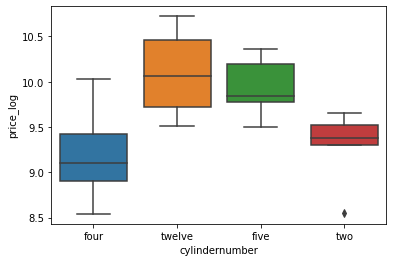

In [128]:
sns.boxplot(CP.cylindernumber,CP.price_log)

In [129]:
result = pairwise_tukeyhsd(CP.price_log, CP.cylindernumber, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  five   four  -0.7717  0.001 -1.0601 -0.4832   True
  five twelve   0.1638 0.5558 -0.1623  0.4899  False
  five    two  -0.6642 0.0038 -1.1631 -0.1652   True
  four twelve   0.9355  0.001  0.7513  1.1196   True
  four    two   0.1075    0.9 -0.3127  0.5277  False
twelve    two   -0.828  0.001 -1.2748 -0.3811   True
----------------------------------------------------


In [130]:
CP.cylindernumber.replace(to_replace=['five','four'],value=['twelve','two'],inplace=True)

In [131]:
result = pairwise_tukeyhsd(CP.price_log, CP.cylindernumber, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
twelve    two  -0.8882 0.001 -1.0112 -0.7653   True
---------------------------------------------------


<AxesSubplot:xlabel='cylindernumber', ylabel='price_log'>

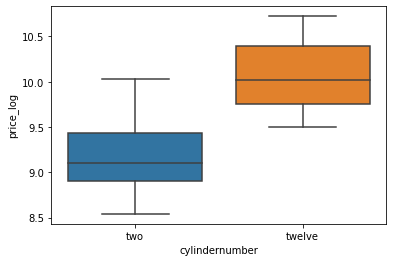

In [132]:
sns.boxplot(CP.cylindernumber,CP.price_log)

 p value(4.032064e-31) is less than 0.05,hence we rejrct the nll hypothesis,i,e atlest one sholud be different from one onother.

# fuelsystem(good)

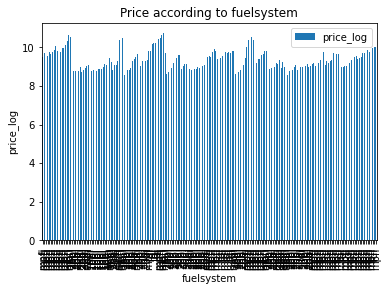

In [133]:
CP.plot(x='fuelsystem', y='price_log', kind="bar")
 
plt.xlabel('fuelsystem')
plt.ylabel('price_log')
plt.title('Price according to fuelsystem')
plt.show()

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

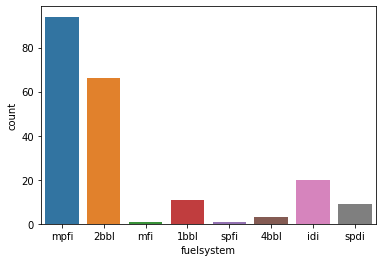

In [134]:
sns.countplot('fuelsystem', data=CP)

<AxesSubplot:xlabel='fuelsystem', ylabel='price_log'>

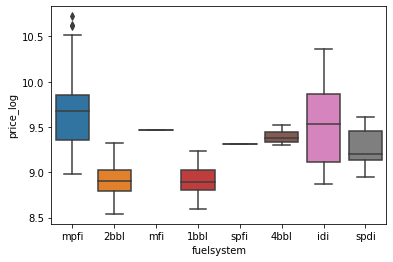

In [135]:
sns.boxplot(CP.fuelsystem,CP.price_log)

In [136]:
mod = ols('price_log ~ fuelsystem', data=CP).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

               df     sum_sq   mean_sq          F        PR(>F)
fuelsystem    7.0  26.766310  3.823759  30.115671  4.464444e-28
Residual    197.0  25.012906  0.126969        NaN           NaN


In [137]:
result = pairwise_tukeyhsd(CP.price_log, CP.fuelsystem, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  1bbl   2bbl   -0.012    0.9 -0.3676  0.3435  False
  1bbl   4bbl   0.4854 0.4266 -0.2256  1.1965  False
  1bbl    idi   0.6424  0.001  0.2326  1.0522   True
  1bbl    mfi   0.5549 0.7868 -0.5853  1.6951  False
  1bbl   mpfi   0.7703  0.001  0.4224  1.1182   True
  1bbl   spdi    0.362 0.3211 -0.1287  0.8526  False
  1bbl   spfi    0.395    0.9 -0.7453  1.5352  False
  2bbl   4bbl   0.4975 0.2646  -0.147  1.1419  False
  2bbl    idi   0.6544  0.001  0.3758  0.9331   True
  2bbl    mfi   0.5669 0.7348  -0.533  1.6669  False
  2bbl   mpfi   0.7823  0.001   0.607  0.9577   True
  2bbl   spdi    0.374 0.0679 -0.0139  0.7619  False
  2bbl   spfi    0.407    0.9 -0.6929  1.5069  False
  4bbl    idi   0.1569    0.9  -0.519  0.8329  False
  4bbl    mfi   0.0695    0.9 -1.1911    1.33  False
  4bbl   mpfi   0.2849 0.8624 -0.3554  0.9251 

In [138]:
CP.fuelsystem.replace(to_replace=['1bbl','1bbl','spdi','mfi'],value=['2bbl','4bbl','spfi','spdi'],inplace=True)

In [139]:
result = pairwise_tukeyhsd(CP.price_log, CP.fuelsystem, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2bbl   4bbl    0.116 0.8724 -0.1875  0.4196  False
  2bbl    idi   0.6544  0.001  0.3911  0.9177   True
  2bbl   mpfi   0.7823  0.001  0.6167   0.948   True
  2bbl   spdi   0.5669 0.6033 -0.4724  1.6062  False
  2bbl   spfi   0.3773 0.0264  0.0272  0.7273   True
  4bbl    idi   0.5384  0.001  0.1789  0.8978   True
  4bbl   mpfi   0.6663  0.001  0.3708  0.9618   True
  4bbl   spdi   0.4509 0.8065 -0.6168  1.5186  False
  4bbl   spfi   0.2612 0.4938 -0.1659  0.6883  False
   idi   mpfi   0.1279 0.6723 -0.1261  0.3819  False
   idi   spdi  -0.0875    0.9 -1.1445  0.9695  False
   idi   spfi  -0.2771 0.3486 -0.6766  0.1224  False
  mpfi   spdi  -0.2154    0.9 -1.2524  0.8216  False
  mpfi   spfi  -0.4051 0.0105 -0.7482 -0.0619   True
  spdi   spfi  -0.1896    0.9 -1.2715  0.8922  False
----------------------------------------------

In [140]:
CP.fuelsystem.replace(to_replace=['mpfi','idi','2bbl','4bbl'],value=['spdi','mpfi','spdi','spfi'],inplace=True)

In [141]:
result = pairwise_tukeyhsd(CP.price_log, CP.fuelsystem, alpha = 0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  mpfi   spdi  -0.1941 0.2273 -0.4718  0.0836  False
  mpfi   spfi  -0.4295  0.013 -0.7842 -0.0749   True
  spdi   spfi  -0.2354 0.0792 -0.4917  0.0209  False
----------------------------------------------------


<AxesSubplot:xlabel='fuelsystem', ylabel='price_log'>

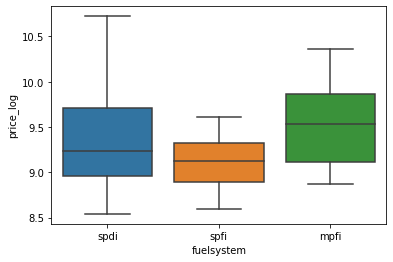

In [142]:
sns.boxplot(CP.fuelsystem,CP.price_log)

In [143]:
CP.fuelsystem.replace(to_replace=['spdi'],value=['spfi'],inplace=True)

<AxesSubplot:xlabel='fuelsystem', ylabel='price_log'>

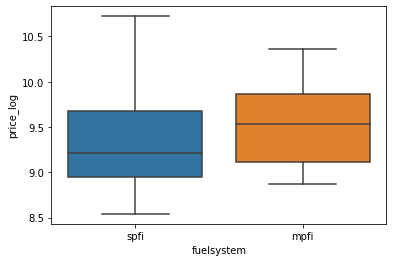

In [144]:
sns.boxplot(CP.fuelsystem,CP.price_log)

P value(4.464444e-28) less than 0.05,hence atlest one should be different from each other.

In [145]:
CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

# Linar Regression Model With OLS

In [146]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [147]:
df1=pd.DataFrame(CP)

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [149]:
df1.drop(['symboling','CarName','fueltype','doornumber','stroke','compressionratio','peakrpm','citympg','highwaympg'],axis=1,inplace=True)

In [150]:
df1.shape

(205, 16)

In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   carbody         205 non-null    object 
 2   drivewheel      205 non-null    object 
 3   enginelocation  205 non-null    object 
 4   wheelbase       205 non-null    float64
 5   carlength       205 non-null    float64
 6   carwidth        205 non-null    float64
 7   carheight       205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   enginetype      205 non-null    object 
 10  cylindernumber  205 non-null    object 
 11  fuelsystem      205 non-null    object 
 12  boreratio       205 non-null    float64
 13  price_log       205 non-null    float64
 14  enginesize_log  205 non-null    float64
 15  horsepower_log  205 non-null    float64
dtypes: float64(8), int64(1), object(7)
memory usage: 25.8+ KB


In [152]:
trn=df1.iloc[0:143,]
tst=df1.iloc[143:205,]

In [153]:
model_1=smf.ols(formula='price_log ~ curbweight+enginesize_log+horsepower_log+carwidth+carlength+wheelbase+boreratio+carheight+aspiration+carbody+drivewheel+enginelocation+enginetype+cylindernumber+fuelsystem',data=trn).fit()

In [154]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     121.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           2.35e-68
Time:                        16:23:23   Log-Likelihood:                 81.388
No. Observations:                 143   AIC:                            -128.8
Df Residuals:                     126   BIC:                            -78.41
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [155]:
df1.drop(['carheight','boreratio','wheelbase','carlength','curbweight','enginelocation'],axis=1,inplace=True)

In [156]:
df1.shape

(205, 10)

In [157]:
model_2=smf.ols(formula='price_log ~ enginesize_log+horsepower_log+carwidth+aspiration+carbody+drivewheel+enginetype+cylindernumber+fuelsystem',data=trn).fit()

In [158]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     179.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.05e-71
Time:                        16:23:23   Log-Likelihood:                 73.050
No. Observations:                 143   AIC:                            -124.1
Df Residuals:                     132   BIC:                            -91.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [159]:
df1.drop('enginesize_log',axis=1,inplace=True)

In [160]:
model_3=smf.ols(formula='price_log ~ horsepower_log+carwidth+aspiration+carbody+drivewheel+enginetype+cylindernumber+fuelsystem',data=trn).fit()

In [161]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     199.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.03e-72
Time:                        16:23:23   Log-Likelihood:                 72.662
No. Observations:                 143   AIC:                            -125.3
Df Residuals:                     133   BIC:                            -95.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [162]:
trn=df1.iloc[0:143,]
tst=df1.iloc[143:205,]

# Test data in Two Parts

In [163]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 143 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      62 non-null     object 
 1   carbody         62 non-null     object 
 2   drivewheel      62 non-null     object 
 3   carwidth        62 non-null     float64
 4   enginetype      62 non-null     object 
 5   cylindernumber  62 non-null     object 
 6   fuelsystem      62 non-null     object 
 7   price_log       62 non-null     float64
 8   horsepower_log  62 non-null     float64
dtypes: float64(3), object(6)
memory usage: 4.5+ KB


In [164]:
x_tst=tst.loc[:,tst.columns != 'price_log']
y_tst=tst.loc[:,tst.columns == 'price_log']

# Prediction on test data

In [165]:
pred_1=model_3.predict(x_tst)

In [166]:
pred_1

143     9.172406
144     9.041363
145     9.115250
146     9.041363
147     9.172406
         ...    
200     9.836195
201     9.938986
202     9.903625
203    10.012325
204     9.619537
Length: 62, dtype: float64

# Residuals

In [167]:
#one problem,y_tst is a data Frame,
#we need to convert into Series.

In [168]:
y_tst_series=y_tst.iloc[:,0]

In [169]:
resd_1=y_tst_series-pred_1

# RMSE:the final verdict

In [170]:
se_1=resd_1.pow(2)

In [171]:
sse_1=se_1.sum()

In [172]:
msse_1=sse_1/len(se_1)
msse_1

0.06712194335140421

In [173]:
import math

math.sqrt(msse_1)

0.25907902916176795

# Linear Regression By SGD Method

In [174]:
df2=pd.DataFrame(CP)

In [175]:
df2.shape

(205, 25)

In [176]:
df2.drop(['symboling','CarName','fueltype','doornumber','stroke','compressionratio','peakrpm','citympg','highwaympg'],axis=1,inplace=True)

In [177]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   carbody         205 non-null    object 
 2   drivewheel      205 non-null    object 
 3   enginelocation  205 non-null    object 
 4   wheelbase       205 non-null    float64
 5   carlength       205 non-null    float64
 6   carwidth        205 non-null    float64
 7   carheight       205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   enginetype      205 non-null    object 
 10  cylindernumber  205 non-null    object 
 11  fuelsystem      205 non-null    object 
 12  boreratio       205 non-null    float64
 13  price_log       205 non-null    float64
 14  enginesize_log  205 non-null    float64
 15  horsepower_log  205 non-null    float64
dtypes: float64(8), int64(1), object(7)
memory usage: 25.8+ KB


In [178]:
dummy=pd.get_dummies(df2[['aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']])
dummy.style

,aspiration_std,aspiration_turbo,carbody_hardtop,carbody_wagon carbody,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_twelve,cylindernumber_two,fuelsystem_mpfi,fuelsystem_spfi
0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1
1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1
2,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1
3,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1
4,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
5,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
6,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
7,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
8,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1
9,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1


In [179]:
merged=pd.concat([df2,dummy],axis='columns')
merged.style

,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,price_log,enginesize_log,horsepower_log,aspiration_std,aspiration_turbo,carbody_hardtop,carbody_wagon carbody,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_twelve,cylindernumber_two,fuelsystem_mpfi,fuelsystem_spfi
0,std,hardtop,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,ohcf,two,spfi,3.470000,9.510075,4.867534,4.709530,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1
1,std,hardtop,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,ohcf,two,spfi,3.470000,9.711116,4.867534,4.709530,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1
2,std,wagon carbody,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,rotor,twelve,spfi,2.680000,9.711116,5.023881,5.036953,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1
3,std,wagon carbody,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,two,spfi,3.190000,9.543235,4.691348,4.624973,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1
4,std,wagon carbody,fwd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,twelve,spfi,3.190000,9.767095,4.912655,4.744932,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
5,std,wagon carbody,fwd,front,99.800000,177.300000,66.300000,53.100000,2507,ohc,twelve,spfi,3.190000,9.632335,4.912655,4.700480,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
6,std,wagon carbody,fwd,front,105.800000,192.700000,71.100000,55.700000,2844,ohc,twelve,spfi,3.190000,9.781885,4.912655,4.700480,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
7,std,wagon carbody,fwd,front,105.800000,192.700000,71.100000,55.700000,2954,ohc,twelve,spfi,3.190000,9.847975,4.912655,4.700480,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1
8,turbo,wagon carbody,fwd,front,105.800000,192.700000,71.100000,55.900000,3086,ohc,twelve,spfi,3.130000,10.080587,4.875197,4.941642,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1
9,turbo,wagon carbody,fwd,front,99.500000,178.200000,67.900000,52.000000,3053,ohc,twelve,spfi,3.130000,9.790272,4.875197,5.075174,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1


In [180]:
final=merged.drop(['aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','enginetype_ohcf'],axis='columns')
final

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,price_log,enginesize_log,horsepower_log,aspiration_std,...,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_twelve,cylindernumber_two,fuelsystem_mpfi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,3.47,9.510075,4.867534,4.709530,1,...,0,1,1,0,0,0,0,1,0,1
1,88.6,168.8,64.1,48.8,2548,3.47,9.711116,4.867534,4.709530,1,...,0,1,1,0,0,0,0,1,0,1
2,94.5,171.2,65.5,52.4,2823,2.68,9.711116,5.023881,5.036953,1,...,0,1,1,0,0,1,1,0,0,1
3,99.8,176.6,66.2,54.3,2337,3.19,9.543235,4.691348,4.624973,1,...,1,0,1,0,1,0,0,1,0,1
4,99.4,176.6,66.4,54.3,2824,3.19,9.767095,4.912655,4.744932,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,3.78,9.731809,4.948760,4.736198,1,...,0,1,1,0,1,0,0,1,0,1
201,109.1,188.8,68.8,55.5,3049,3.78,9.854560,4.948760,5.075174,0,...,0,1,1,0,1,0,0,1,0,1
202,109.1,188.8,68.9,55.5,3012,3.58,9.975110,5.153292,4.897840,1,...,0,1,1,0,0,1,1,0,0,1
203,109.1,188.8,68.9,55.5,3217,3.01,10.019936,4.976734,4.663439,0,...,0,1,1,0,1,0,1,0,1,0


In [181]:
final.style

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,price_log,enginesize_log,horsepower_log,aspiration_std,aspiration_turbo,carbody_hardtop,carbody_wagon carbody,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_twelve,cylindernumber_two,fuelsystem_mpfi,fuelsystem_spfi
0,88.600000,168.800000,64.100000,48.800000,2548,3.470000,9.510075,4.867534,4.709530,1,0,1,0,0,1,1,0,0,0,0,1,0,1
1,88.600000,168.800000,64.100000,48.800000,2548,3.470000,9.711116,4.867534,4.709530,1,0,1,0,0,1,1,0,0,0,0,1,0,1
2,94.500000,171.200000,65.500000,52.400000,2823,2.680000,9.711116,5.023881,5.036953,1,0,0,1,0,1,1,0,0,1,1,0,0,1
3,99.800000,176.600000,66.200000,54.300000,2337,3.190000,9.543235,4.691348,4.624973,1,0,0,1,1,0,1,0,1,0,0,1,0,1
4,99.400000,176.600000,66.400000,54.300000,2824,3.190000,9.767095,4.912655,4.744932,1,0,0,1,1,0,1,0,1,0,1,0,0,1
5,99.800000,177.300000,66.300000,53.100000,2507,3.190000,9.632335,4.912655,4.700480,1,0,0,1,1,0,1,0,1,0,1,0,0,1
6,105.800000,192.700000,71.100000,55.700000,2844,3.190000,9.781885,4.912655,4.700480,1,0,0,1,1,0,1,0,1,0,1,0,0,1
7,105.800000,192.700000,71.100000,55.700000,2954,3.190000,9.847975,4.912655,4.700480,1,0,0,1,1,0,1,0,1,0,1,0,0,1
8,105.800000,192.700000,71.100000,55.900000,3086,3.130000,10.080587,4.875197,4.941642,0,1,0,1,1,0,1,0,1,0,1,0,0,1
9,99.500000,178.200000,67.900000,52.000000,3053,3.130000,9.790272,4.875197,5.075174,0,1,0,1,1,0,1,0,1,0,1,0,0,1


In [182]:
X=final.drop(['price_log'],axis='columns')
X

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,enginesize_log,horsepower_log,aspiration_std,aspiration_turbo,...,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_twelve,cylindernumber_two,fuelsystem_mpfi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,3.47,4.867534,4.709530,1,0,...,0,1,1,0,0,0,0,1,0,1
1,88.6,168.8,64.1,48.8,2548,3.47,4.867534,4.709530,1,0,...,0,1,1,0,0,0,0,1,0,1
2,94.5,171.2,65.5,52.4,2823,2.68,5.023881,5.036953,1,0,...,0,1,1,0,0,1,1,0,0,1
3,99.8,176.6,66.2,54.3,2337,3.19,4.691348,4.624973,1,0,...,1,0,1,0,1,0,0,1,0,1
4,99.4,176.6,66.4,54.3,2824,3.19,4.912655,4.744932,1,0,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,3.78,4.948760,4.736198,1,0,...,0,1,1,0,1,0,0,1,0,1
201,109.1,188.8,68.8,55.5,3049,3.78,4.948760,5.075174,0,1,...,0,1,1,0,1,0,0,1,0,1
202,109.1,188.8,68.9,55.5,3012,3.58,5.153292,4.897840,1,0,...,0,1,1,0,0,1,1,0,0,1
203,109.1,188.8,68.9,55.5,3217,3.01,4.976734,4.663439,0,1,...,0,1,1,0,1,0,1,0,1,0


In [183]:
Y=final.price_log
Y

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price_log, Length: 205, dtype: float64

In [184]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   boreratio              205 non-null    float64
 6   price_log              205 non-null    float64
 7   enginesize_log         205 non-null    float64
 8   horsepower_log         205 non-null    float64
 9   aspiration_std         205 non-null    uint8  
 10  aspiration_turbo       205 non-null    uint8  
 11  carbody_hardtop        205 non-null    uint8  
 12  carbody_wagon carbody  205 non-null    uint8  
 13  drivewheel_fwd         205 non-null    uint8  
 14  drivewheel_rwd         205 non-null    uint8  
 15  engine

# Train Test

In [185]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=0)

# Standardize the predictors

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
sc_x=StandardScaler()

In [188]:
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.fit_transform(xtest)

In [189]:
xtrain.shape

(164, 22)

In [190]:
xtest.shape

(41, 22)

In [191]:
ytrain.shape

(164,)

In [192]:
ytrain.shape

(164,)

# Model

In [193]:
from sklearn.linear_model import SGDRegressor

In [194]:
sgdr=SGDRegressor()
sgdr.fit(xtrain,ytrain)

SGDRegressor()

In [195]:
score=sgdr.score(xtrain,ytrain)

In [196]:
print('R-squared:',score)

R-squared: 0.906621714082642


In [197]:
#prediction
y_pred=sgdr.predict(xtest)

In [198]:
#evaluating the prediction
mse=mean_squared_error(ytest,y_pred)
print('MSE:',mse)
print('RMSE:',np.sqrt(mse))

MSE: 0.04287063827151528
RMSE: 0.20705225975949956
